In [ ]:
import numpy as np 
import pandas as pd


/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# Test Data

In [2]:
test_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv")
test_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,2009-11-21,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN
1,2010-02-04,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN
2,2010-07-28,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN
3,2010-06-09,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN
4,2008-03-02,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure


In [3]:
test_df.shape

(10000, 15)

# Train Data

In [4]:
train_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv")
train_df.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


# Submission

In [5]:
submission_df = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")

In [6]:
submission_df

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes
...,...,...
9995,9995,yes
9996,9996,no
9997,9997,no
9998,9998,no


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [8]:
train_df.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
feature_list = train_df.columns[:-1].values
label = [train_df.columns[-1]]

print("Feature list:", feature_list)
print("Label:", label)

Feature list: ['last contact date' 'age' 'job' 'marital' 'education' 'default' 'balance'
 'housing' 'loan' 'contact' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome']
Label: ['target']


In [10]:
train_df.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

# Finding out percentage of missing values

In [11]:
missing_values = train_df.isnull().sum() / len(train_df) * 100
print(missing_values)

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64


# Removing columns having higher oercentage of missing values

In [12]:
train_df_cleaned = train_df.drop(columns=['contact'])
train_df_cleaned.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,445,2,-1,0,NaN,no


# Data Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


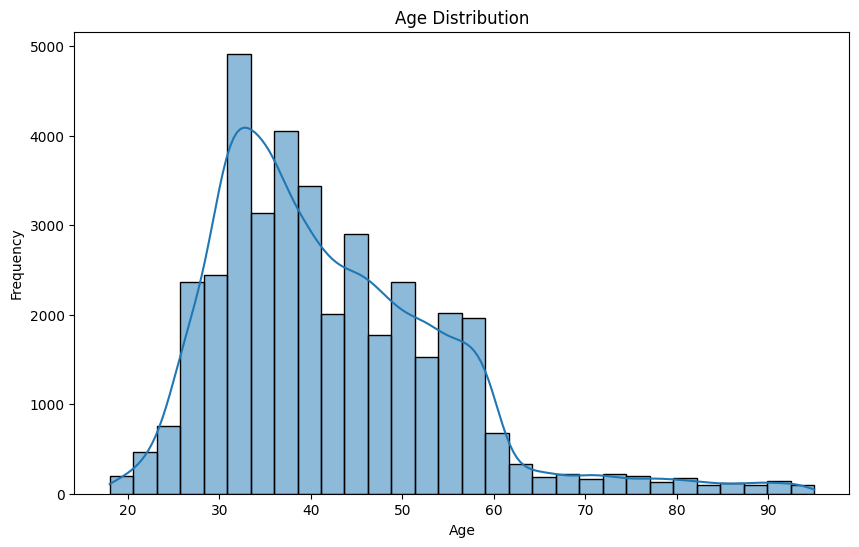

In [14]:
#age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

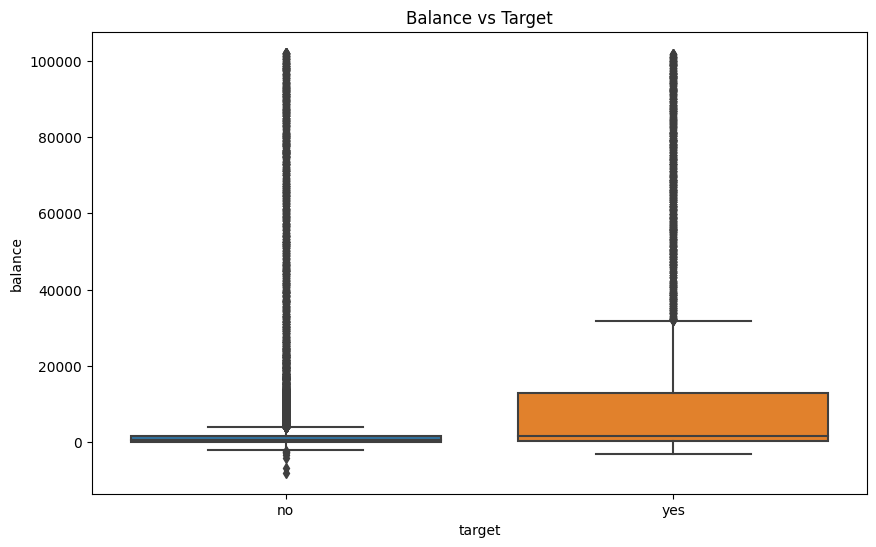

In [15]:
#balance distribution
plt.figure(figsize=(10,6))
sns.boxplot(x='target', y= 'balance', data=train_df)
plt.title('Balance vs Target')
plt.show()

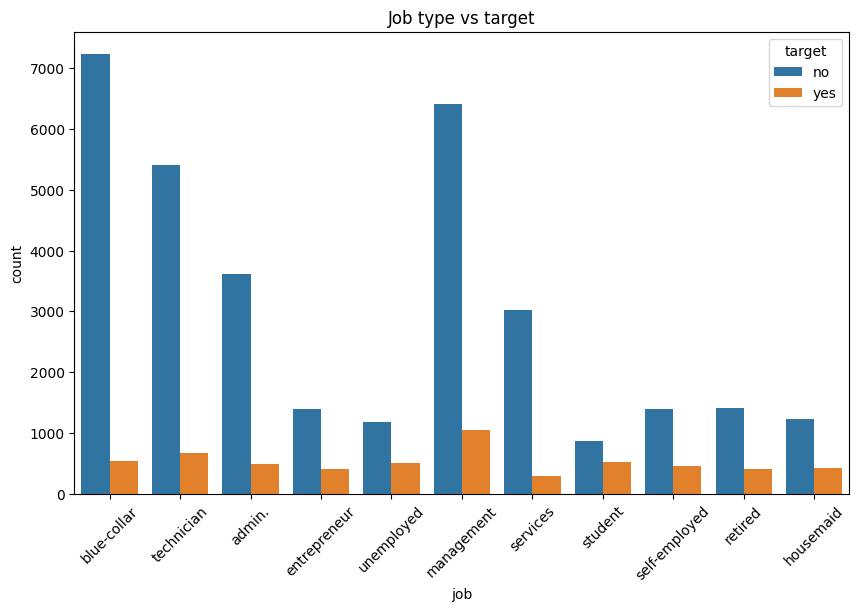

In [16]:
#count plot for job
plt.figure(figsize=(10,6))
sns.countplot(x='job',hue='target', data=train_df)
plt.title('Job type vs target')
plt.xticks(rotation=45)
plt.show()

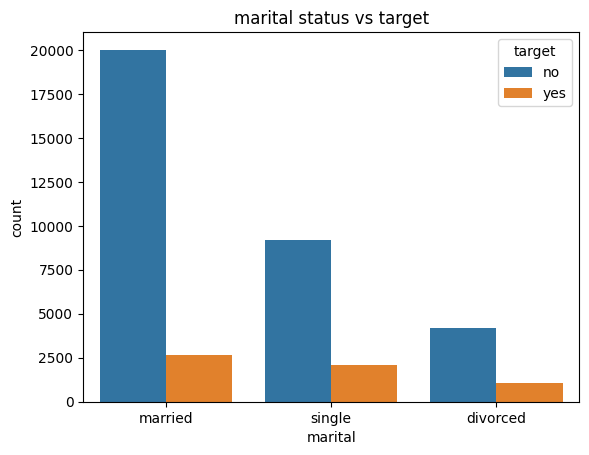

In [17]:
#plot for martial status
sns.countplot(x='marital',hue='target', data=train_df)
plt.title('marital status vs target')
plt.show()

# Performing Transformation for numerical and categorical values

In [18]:
from sklearn.compose import ColumnTransformer
num_attribs = train_df_cleaned.select_dtypes(include=['int64']).columns
cat_attribs = train_df_cleaned.select_dtypes(include=['object']).drop('target', axis=1).columns
num_attribs
cat_attribs

Index(['last contact date', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'poutcome'],
      dtype='object')

In [19]:
num_attribs

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [20]:
cat_attribs

Index(['last contact date', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'poutcome'],
      dtype='object')

# Fidning Correaltion for numerical attributes

Text(0.5, 1.0, 'Correlation matrix of numerical attributes')

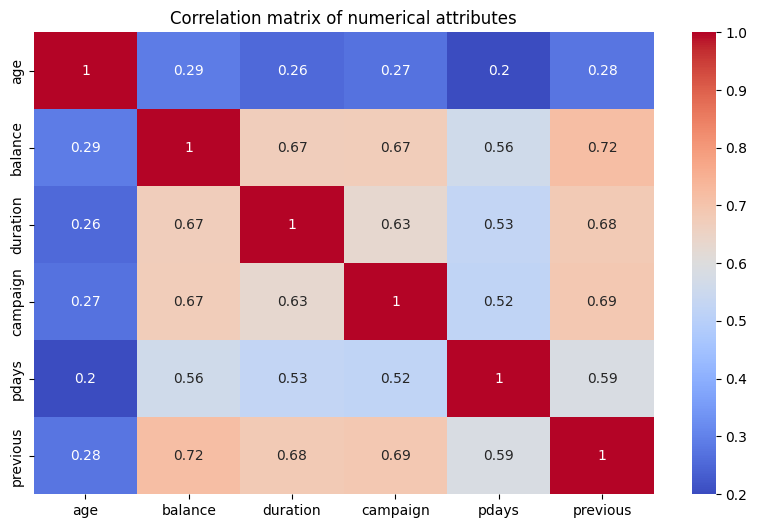

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df[num_attribs].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical attributes')

# Train Validation Split

In [22]:
from sklearn.model_selection import train_test_split

x = train_df.drop('target', axis=1)
y = train_df['target']

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.15, random_state=42,stratify=y)

print(x_train.shape, x_val.shape)

(33329, 15) (5882, 15)


In [23]:
x_val

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
19237,2009-07-21,42,blue-collar,married,primary,no,401,yes,no,cellular,581,4,-1,0,NaN
23823,2010-07-21,27,admin.,married,secondary,no,436,yes,no,cellular,410,1,-1,0,NaN
15309,2008-05-27,36,services,divorced,secondary,no,-330,yes,yes,NaN,207,2,-1,0,NaN
1913,2008-11-20,35,management,married,primary,no,3369,no,no,cellular,322,1,-1,0,NaN
1775,2010-07-16,27,management,single,tertiary,no,151,yes,no,cellular,496,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31982,2008-01-29,26,unemployed,married,primary,no,205,no,no,cellular,239,1,-1,0,NaN
8291,2008-05-26,54,technician,married,tertiary,no,-800,yes,no,NaN,445,2,-1,0,NaN
4971,2009-04-22,25,student,single,secondary,no,8,no,no,cellular,107,2,-1,0,NaN
17252,2008-10-29,30,management,married,tertiary,no,944,no,no,cellular,251,2,-1,0,NaN


# Data Cleaning/Preprocessing

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline

# Identify and treat outliers

In [25]:
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler

def cap_outliers(df, columns, threshold=3):
    for col in columns:
        df[col] = np.where(
            np.abs(zscore(df[col])) > threshold, 
            np.sign(zscore(df[col])) * threshold, 
            df[col]
        )
    return df

# Apply outlier capping to relevant numeric columns

In [26]:
x_train = cap_outliers(x_train, num_attribs)

# Preprocessing pipeline with RobustScaler for outlier resistance

In [27]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()) 
])

In [28]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [29]:
# preprocessing for both numeric and categorical
preprocessor = ColumnTransformer(
                    transformers=[
                        ('num', num_transformer, num_attribs),
                        ('cat', cat_transformer, cat_attribs)
                    ])

In [30]:
#Adding variance threshold
full_pipeline  = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('selector', VarianceThreshold(threshold=0.01))
])

In [31]:
# Fit and transform the data
x_train_processed = full_pipeline.fit_transform(x_train)
x_val_processed = full_pipeline.transform(x_val)
test_df_processed = full_pipeline.transform(test_df)

# SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_processed, y_train)

# Using Logistic regression as a Baseline Model

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(max_iter=2000)

# Selecting important feature

In [35]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(model, direction='backward', scoring='accuracy', cv=5, n_features_to_select='auto')

In [ ]:
# Fit SFS on the processed training data
x_train_selected = sfs.fit_transform(x_train_balanced, y_train_balanced)
x_val_selected = sfs.transform(x_val_processed)
x_val_selected_lr = x_val_selected

In [ ]:
test_df_selected = sfs.transform(test_df_processed)

# Hyper parameter tunnning with GridCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
param_grid = [
    {
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
        'solver': ['liblinear'],
        'class_weight': ['balanced', None],
        'penalty': ['l1', 'l2']
    },
    {
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
        'solver': ['saga'],
        'class_weight': ['balanced', None],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'l1_ratio': [0.1, 0.5, 0.9] 
    },
    {
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
        'solver': ['newton-cholesky'],
        'class_weight': ['balanced', None],
        'penalty': ['l2']
    }
]


# Using Exhaustive search for all possible models

In [ ]:
from sklearn.model_selection import GridSearchCV
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    error_score='raise'  # Helps debug errors
)

In [ ]:
grid_search.fit(x_train_selected, y_train_balanced)

In [ ]:
# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

In [ ]:
best_params = grid_search.best_params_
final_model = LogisticRegression(**best_params, max_iter=2000)

# Fitting the best model

In [ ]:
# Fit the final model on the training data
final_model.fit(x_train_selected, y_train_balanced)

# Validation test

In [ ]:
#make prediction
y_val_pred = final_model.predict(x_val_selected)
y_val_pred

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Initialize a figure for displaying all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

In [ ]:
# Predict on the validation set
y_val_pred = final_model.predict(x_val_selected)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Scoring Report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
y_val_pred = final_model.predict(x_val_selected)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='yes')
recall = recall_score(y_val, y_val_pred, pos_label='yes')
f1 = f1_score(y_val, y_val_pred, pos_label='yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=['no', 'yes']))
print("\n")

# Test set

In [ ]:
y_test_pred = final_model.predict(test_df_selected)
y_test_pred

In [ ]:
submission = pd.DataFrame({"id" : range(0,test_df.shape[0]),
                          "target" : y_test_pred})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
# print("Validation Accuracy:", accuracy_score(y_val, y_pred))
# print("Classification Report:\n", classification_report(y_val, y_pred))

# DummyClassifier as a base model

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train,y_train)

# Validation set

In [ ]:
y_dummy_pred = dummy_clf.predict(x_val)
y_dummy_pred

In [ ]:
print(f"Dummy Classifier Accuracy: {accuracy_score(y_val, y_dummy_pred)}")
print(classification_report(y_val, y_dummy_pred))

# Test Set

In [ ]:
# y_test_pred = dummy_clf.predict(test_df)
# y_test_pred

In [ ]:
# submission = pd.DataFrame({"id" : range(0,test_df.shape[0]),
#                           "target" : y_test_pred})

In [ ]:
# submission.to_csv('submission.csv', index=False)

# Model 2

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_model = SGDClassifier(random_state=42, max_iter=1000)

In [ ]:
param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['optimal', 'constant', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]  
}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Set up GridSearchCV
grid_search_sgd = GridSearchCV(
    estimator=sgd_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
)

In [ ]:
grid_search_sgd.fit(x_train_selected, y_train_balanced)

In [ ]:
# Display best parameters and score
print("Best Parameters:", grid_search_sgd.best_params_)
print("Best Score:", grid_search_sgd.best_score_)

In [ ]:
best_model_sgd = grid_search_sgd.best_estimator_
best_params_sgd = grid_search_sgd.best_params_
print("Best parameters:", best_params_sgd)

In [ ]:
#make prediction
y_val_pred = best_model_sgd.predict(x_val_selected)
y_val_pred

# Confusion Matrix

In [ ]:
# Initialize a figure for displaying all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

In [ ]:
# Predict on the validation set
y_val_pred = best_model_sgd.predict(x_val_selected)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_sgd.classes_)
disp.plot(cmap='Blues', colorbar=True)
plt.title("SGD Regression Confusion Matrix")
plt.show()

# Scoring Report 

In [ ]:
y_val_pred = best_model_sgd.predict(x_val_selected)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='yes')
recall = recall_score(y_val, y_val_pred, pos_label='yes')
f1 = f1_score(y_val, y_val_pred, pos_label='yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=['no', 'yes']))
print("\n")

# Model 3

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Define Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
from sklearn.tree import DecisionTreeClassifier

x_train_balanced_dense = x_train_balanced.toarray() if hasattr(x_train_balanced, "toarray") else x_train_balanced
x_val_processed_dense = x_val_processed.toarray() if hasattr(x_val_processed, "toarray") else x_val_processed
test_df_processed_dense = test_df_processed.toarray() if hasattr(test_df_processed, "toarray") else test_df_processed

estimator = DecisionTreeClassifier(random_state=42)
estimator.fit(x_train_balanced_dense, y_train_balanced)

perm_importance = permutation_importance(
    estimator, 
    x_train_balanced_dense, 
    y_train_balanced, 
    n_repeats=10,  
    random_state=42, 
    scoring="accuracy" 
)

for i in range(len(perm_importance.importances_mean)):
    print(f"Feature {i}: Importance {perm_importance.importances_mean[i]:.4f}")

threshold = 0.01
selected_features_indices = np.where(perm_importance.importances_mean > threshold)[0]

x_train_selected = x_train_balanced_dense[:, selected_features_indices]
x_val_selected = x_val_processed_dense[:, selected_features_indices]
x_val_selected_rf = x_val_selected
test_df_selected = test_df_processed_dense[:, selected_features_indices]

print(f"Selected feature indices: {selected_features_indices}")

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  
    cv=5,  
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

In [ ]:
# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train_selected, y_train_balanced)

In [ ]:
# Get the best Random Forest model
best_rf_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

In [ ]:
#make prediction
y_val_pred = best_rf_model.predict(x_val_selected)
y_val_pred

# Confusion Matrix

In [ ]:
# Initialize a figure for displaying all confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

In [ ]:
# Predict on the validation set
y_val_pred = best_rf_model.predict(x_val_selected)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap='Blues', colorbar=True)
plt.title("Random Forest Confusion Matrix")
plt.show()

# Scoring Report

In [ ]:
y_val_pred = best_rf_model.predict(x_val_selected)

# Calculate metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='yes')
recall = recall_score(y_val, y_val_pred, pos_label='yes')
f1 = f1_score(y_val, y_val_pred, pos_label='yes')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred, target_names=['no', 'yes']))
print("\n")